In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
df= pd.read_csv(r"pd_speech_features.csv")

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [44]:
df.isnull().any()

id                           False
gender                       False
PPE                          False
DFA                          False
RPDE                         False
                             ...  
tqwt_kurtosisValue_dec_33    False
tqwt_kurtosisValue_dec_34    False
tqwt_kurtosisValue_dec_35    False
tqwt_kurtosisValue_dec_36    False
class                        False
Length: 755, dtype: bool

In [45]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [46]:
print(X)

[[  0.        1.        0.85247 ...   2.6202    3.0004   18.9405 ]
 [  0.        1.        0.76686 ...   6.5245    6.3431   45.178  ]
 [  0.        1.        0.85083 ...   2.9199    3.1495    4.7666 ]
 ...
 [251.        0.        0.88389 ...   3.5377    3.3545    5.0424 ]
 [251.        0.        0.83782 ...   2.6801    2.8332    3.7131 ]
 [251.        0.        0.81304 ...   4.0116    2.6217    3.1527 ]]


In [47]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)
X_Scale

array([[-1.72519117,  0.96874225,  0.62764391, ..., -0.775137  ,
        -0.81472704, -0.36659507],
       [-1.72519117,  0.96874225,  0.12161952, ..., -0.52664699,
        -0.58297219,  0.40039616],
       [-1.72519117,  0.96874225,  0.61795018, ..., -0.75606253,
        -0.8043897 , -0.7809355 ],
       ...,
       [ 1.72519117, -1.03226633,  0.81336154, ..., -0.71674252,
        -0.79017671, -0.77287314],
       [ 1.72519117, -1.03226633,  0.54105055, ..., -0.77132466,
        -0.82631929, -0.81173208],
       [ 1.72519117, -1.03226633,  0.3945807 , ..., -0.68658105,
        -0.84098293, -0.82811405]])

In [48]:
X_Scale.shape

(756, 754)

In [49]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471076,-6.846404,1
1,-10.637725,1.583749,-6.830977,1
2,-13.516185,-1.253542,-6.818697,1
3,-9.155083,8.833600,15.290898,1
4,-6.764470,4.611465,15.637113,1


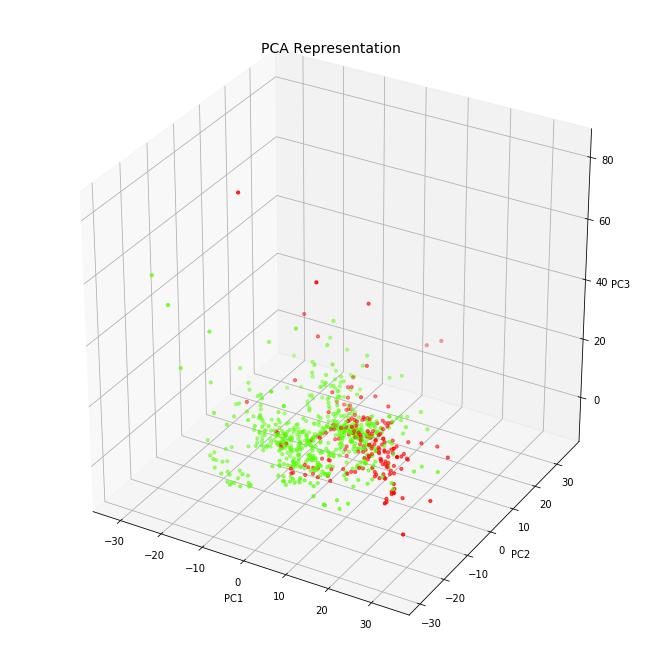

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['class'], cmap = 'prism', s=10)

Apply SVM

In [51]:
from sklearn.model_selection import train_test_split, cross_validate
training_set = finalDf[::-1]
labels = finalDf["class"]


X_train, X_val, Y_train, Y_val = train_test_split(training_set, labels, test_size=0.3, random_state=0)

In [52]:
X_train.head()

,principal component 1,principal component 2,principal component 3,class
175,-1.888843,-2.410033,-6.888701,1
64,-9.681345,-2.826047,-5.915025,1
440,-4.096262,9.699011,-0.957693,1
555,-0.576323,10.768601,1.271319,1
436,9.454904,8.833950,0.601404,1


In [53]:

from sklearn.svm import SVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_val)

from sklearn.metrics import classification_report
# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_val, y_pred))
# Package used to get the Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.75      0.99      0.85       170

    accuracy                           0.74       227
   macro avg       0.37      0.50      0.43       227
weighted avg       0.56      0.74      0.64       227

[[  0  57]
 [  1 169]]
accuracy is 0.7444933920704846
